###**EXPLORATORY DATA ANALYSIS**

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import pandas as pd

In [2]:
!unzip dataset.zip


Archive:  dataset.zip
  inflating: Tweets.csv              
  inflating: database.sqlite         


In [25]:
df = pd.read_csv('Tweets.csv')
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [26]:
# Get unique values for each column
for column in df.columns:
    unique_values = df[column].unique()
    print(f"Unique values in column '{column}':\n{unique_values}\n")


Unique values in column 'tweet_id':
[570306133677760513 570301130888122368 570301083672813571 ...
 569587242672398336 569587188687634433 569587140490866689]

Unique values in column 'airline_sentiment':
['neutral' 'positive' 'negative']

Unique values in column 'airline_sentiment_confidence':
[1.     0.3486 0.6837 ... 0.6384 0.7094 0.3487]

Unique values in column 'negativereason':
[nan 'Bad Flight' "Can't Tell" 'Late Flight' 'Customer Service Issue'
 'Flight Booking Problems' 'Lost Luggage' 'Flight Attendant Complaints'
 'Cancelled Flight' 'Damaged Luggage' 'longlines']

Unique values in column 'negativereason_confidence':
[   nan 0.     0.7033 ... 0.6234 0.644  0.7255]

Unique values in column 'airline':
['Virgin America' 'United' 'Southwest' 'Delta' 'US Airways' 'American']

Unique values in column 'airline_sentiment_gold':
[nan 'negative' 'neutral' 'positive']

Unique values in column 'name':
['cairdin' 'jnardino' 'yvonnalynn' ... 'KristenReenders' 'itsropes'
 'sanyabun']

Unique v

In [27]:
for column in df.columns:
    unique_count = df[column].nunique()
    print(f"Column '{column}' has {unique_count} unique values.")


Column 'tweet_id' has 14485 unique values.
Column 'airline_sentiment' has 3 unique values.
Column 'airline_sentiment_confidence' has 1023 unique values.
Column 'negativereason' has 10 unique values.
Column 'negativereason_confidence' has 1410 unique values.
Column 'airline' has 6 unique values.
Column 'airline_sentiment_gold' has 3 unique values.
Column 'name' has 7701 unique values.
Column 'negativereason_gold' has 13 unique values.
Column 'retweet_count' has 18 unique values.
Column 'text' has 14427 unique values.
Column 'tweet_coord' has 832 unique values.
Column 'tweet_created' has 14247 unique values.
Column 'tweet_location' has 3081 unique values.
Column 'user_timezone' has 85 unique values.


<ipython-input-28-eb8ac995a131>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=negative_reason_counts.values, y=negative_reason_counts.index, palette="muted")


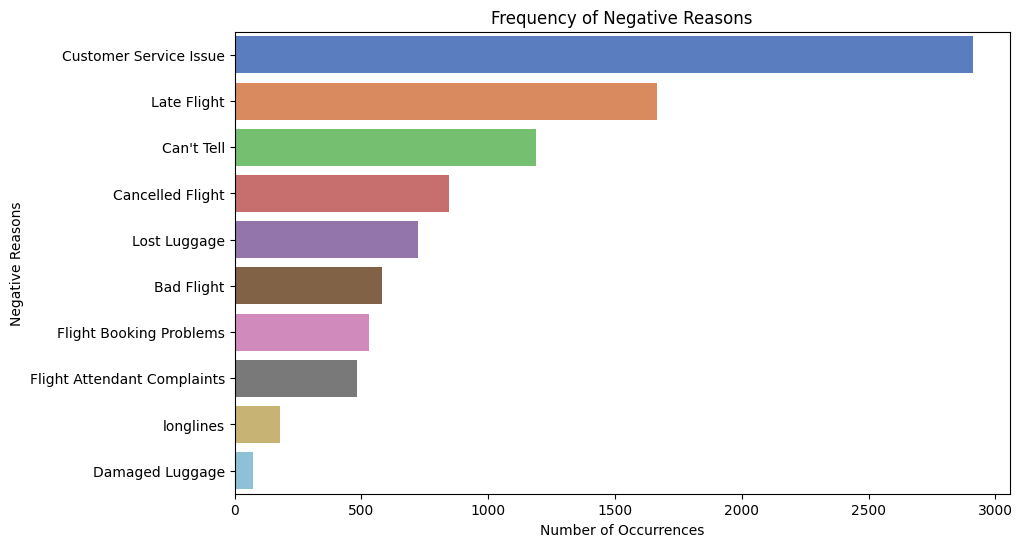

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('Tweets.csv')

# Drop rows with null values in the 'negativereason' column
df_cleaned = df.dropna(subset=['negativereason'])

# Count the occurrences of each negative reason
negative_reason_counts = df_cleaned['negativereason'].value_counts()

# Plot the bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=negative_reason_counts.values, y=negative_reason_counts.index, palette="muted")
plt.title('Frequency of Negative Reasons')
plt.xlabel('Number of Occurrences')
plt.ylabel('Negative Reasons')

# Show the plot
plt.show()


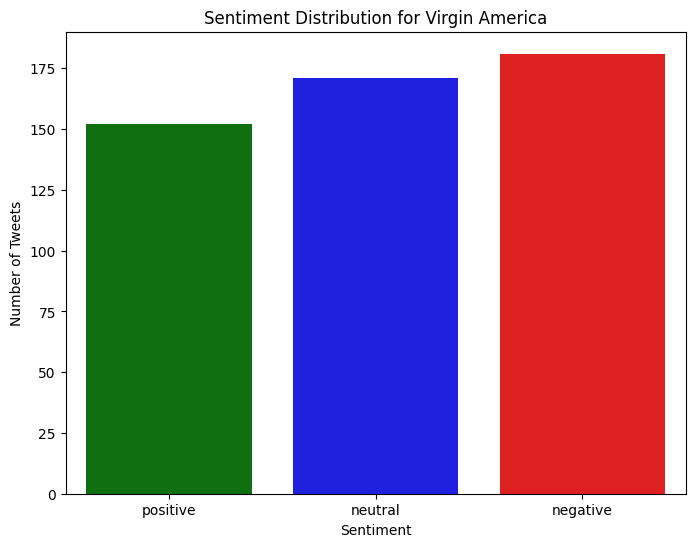

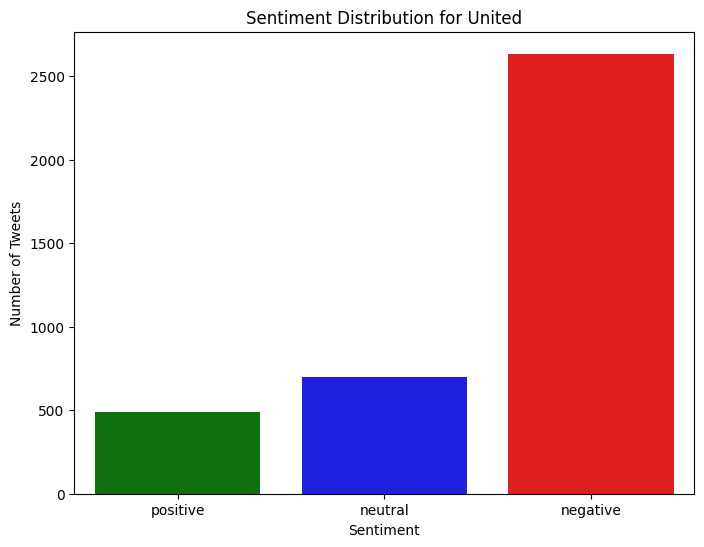

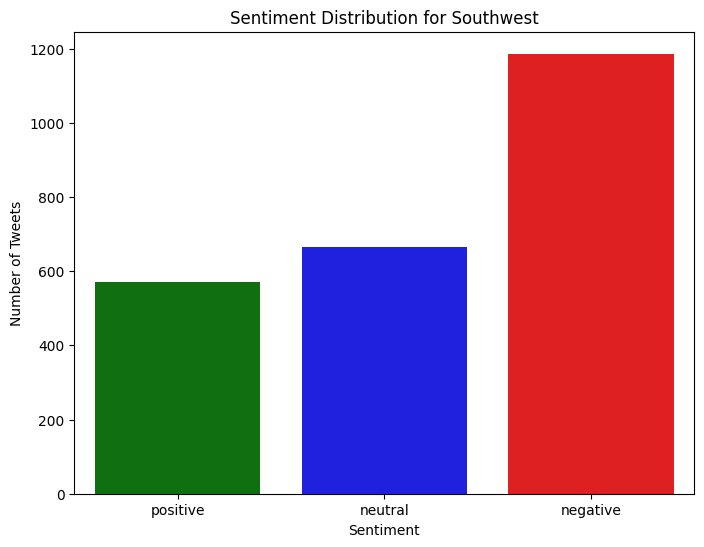

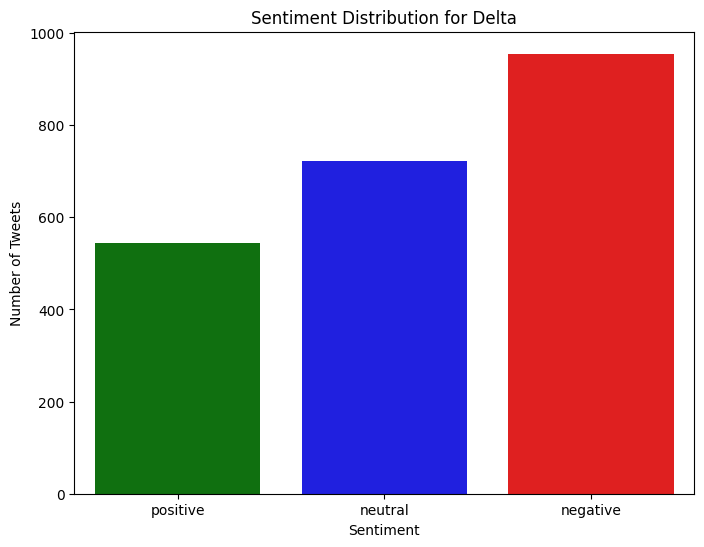

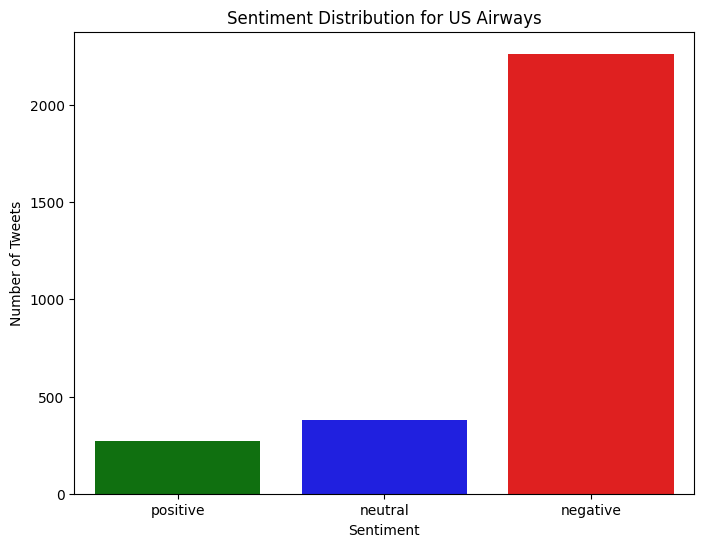

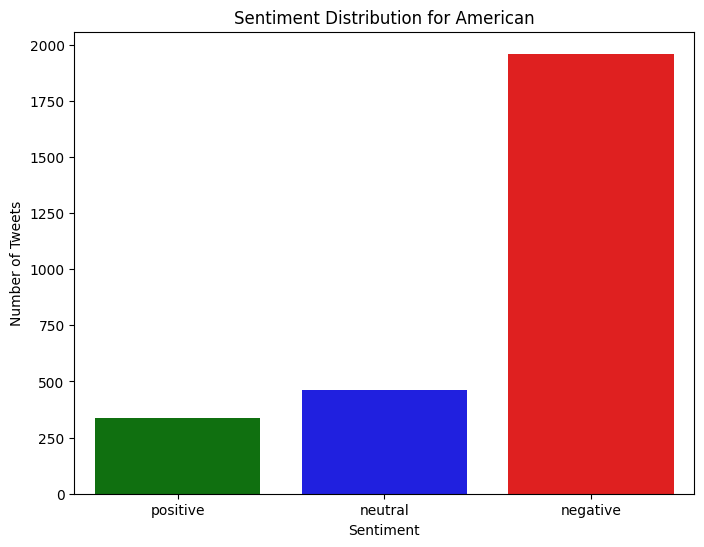

In [29]:
# Drop rows with null values in 'airline_sentiment' and 'airline'
df_cleaned = df.dropna(subset=['airline_sentiment', 'airline'])

# Get the unique airlines
airlines = df_cleaned['airline'].unique()

# Set colors for each sentiment (green for positive, blue for neutral, red for negative)
palette = {"positive": "green", "neutral": "blue", "negative": "red"}

# Create separate plots for each airline
for airline in airlines:
    plt.figure(figsize=(8, 6))

    # Filter data for the current airline
    airline_data = df_cleaned[df_cleaned['airline'] == airline]

    # Create a count plot for sentiment distribution for this airline
    sns.countplot(data=airline_data, x='airline_sentiment', hue='airline_sentiment', palette=palette, order=['positive', 'neutral', 'negative'], legend=False)

    # Add titles and labels
    plt.title(f'Sentiment Distribution for {airline}')
    plt.xlabel('Sentiment')
    plt.ylabel('Number of Tweets')

    # Show the plot
    plt.show()


In [30]:
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [31]:
# Check the count of each unique value in the 'airline_sentiment' column
sentiment_counts = df_cleaned['airline_sentiment'].value_counts()

# Display the counts
print("Count of each value in 'airline_sentiment':")
print(sentiment_counts)


Count of each value in 'airline_sentiment':
airline_sentiment
negative    9178
neutral     3099
positive    2363
Name: count, dtype: int64


In [32]:
# Install the vaderSentiment module
!pip install vaderSentiment

Import libraries

In [78]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from textblob import TextBlob
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
import folium
from ast import literal_eval
from folium.plugins import MarkerCluster
from IPython.display import display
from collections import Counter


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [79]:
# Load the dataset
df_original = pd.read_csv('Tweets.csv')
print(df_original.info())

# Data cleaning
df_cleaned = df_original[['airline_sentiment', 'airline_sentiment_confidence', 'text']]
df_cleaned = df_cleaned[df_cleaned['airline_sentiment_confidence'] > 0.6]

# Initialize Lemmatizer and stopwords
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

# Define cleaning function
def clean_text(text):
    text = re.sub(r'http\S+', '', text)  # Remove URLs
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # Remove special characters
    text = text.lower()  # Convert to lowercase
    words = word_tokenize(text)
    words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]
    return ' '.join(words)

# Text cleaning
df_cleaned['clean_text'] = df_cleaned['text'].apply(clean_text)

# Drop rows with missing values
df_cleaned = df_cleaned.dropna(subset=['clean_text', 'airline_sentiment'])

# Encode sentiment labels: 'positive' -> 1, 'neutral' -> 0, 'negative' -> -1
df_cleaned['sentiment_label'] = df_cleaned['airline_sentiment'].map({'positive': 1, 'neutral': 0, 'negative': -1})


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  int64  
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14640 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14640 non-null  int64  
 10  text                          14640 non-null  object 
 11  tweet_coord                   1019 non-null   object 
 12  tweet_created                 14640 non-null  object 
 13  t

In [81]:
# Sentiment analysis using VADER and TextBlob
analyzer = SentimentIntensityAnalyzer()

def textblob_sentiment(text):
    analysis = TextBlob(text)
    return analysis.sentiment.polarity  # Returns polarity score (-1 to 1)

def vader_sentiment(text):
    return analyzer.polarity_scores(text)['compound']  # Compound score (-1 to 1)

# Create a new DataFrame for sentiment analysis results
df_sentiment = df_cleaned.copy()

# Apply sentiment analysis
df_sentiment['textblob_sentiment'] = df_sentiment['clean_text'].apply(textblob_sentiment)
df_sentiment['vader_sentiment'] = df_sentiment['clean_text'].apply(vader_sentiment)

# Convert lexicon-based results to binary/multi-class labels
def sentiment_label(score):
    if score > 0:
        return 1  # Positive
    elif score < 0:
        return -1  # Negative
    else:
        return 0  # Neutral

df_sentiment['textblob_label'] = df_sentiment['textblob_sentiment'].apply(sentiment_label)
df_sentiment['vader_label'] = df_sentiment['vader_sentiment'].apply(sentiment_label)


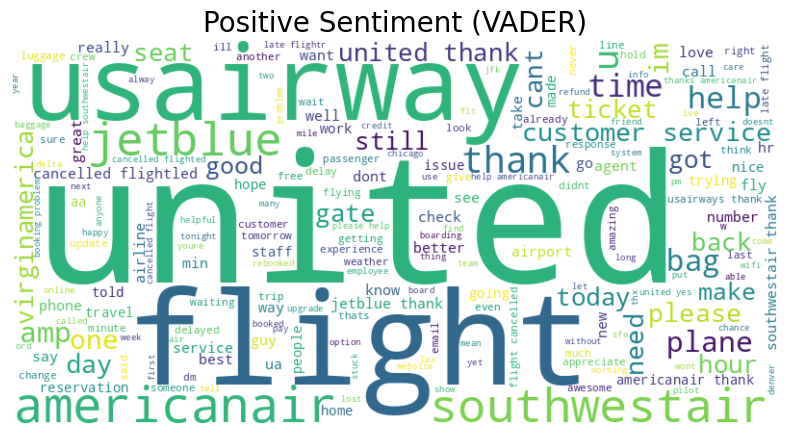

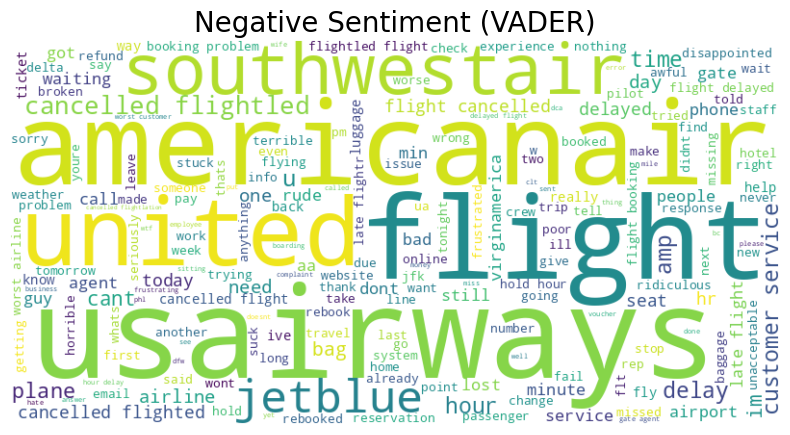

In [82]:
def generate_wordcloud(text, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title, size=20)
    plt.show()

# Separate the positive and negative tweets based on VADER
positive_text = " ".join(df_sentiment[df_sentiment['vader_sentiment'] > 0]['clean_text'].tolist())
negative_text = " ".join(df_sentiment[df_sentiment['vader_sentiment'] < 0]['clean_text'].tolist())

# Plot positive and negative sentiment word clouds
generate_wordcloud(positive_text, 'Positive Sentiment (VADER)')
generate_wordcloud(negative_text, 'Negative Sentiment (VADER)')

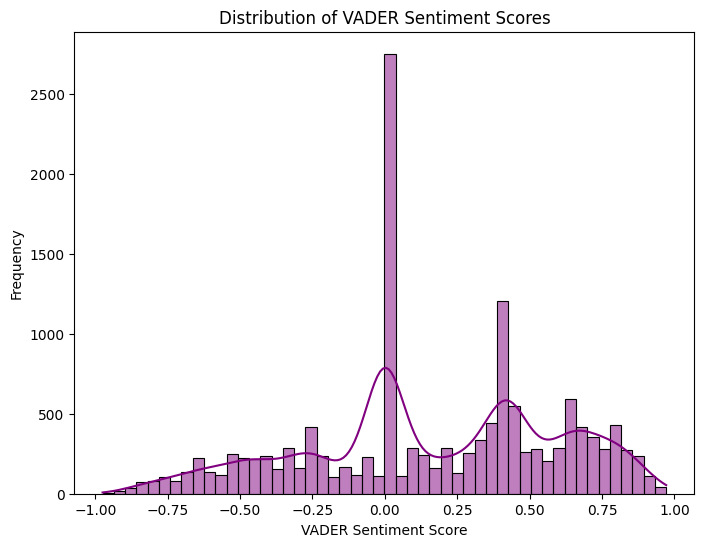

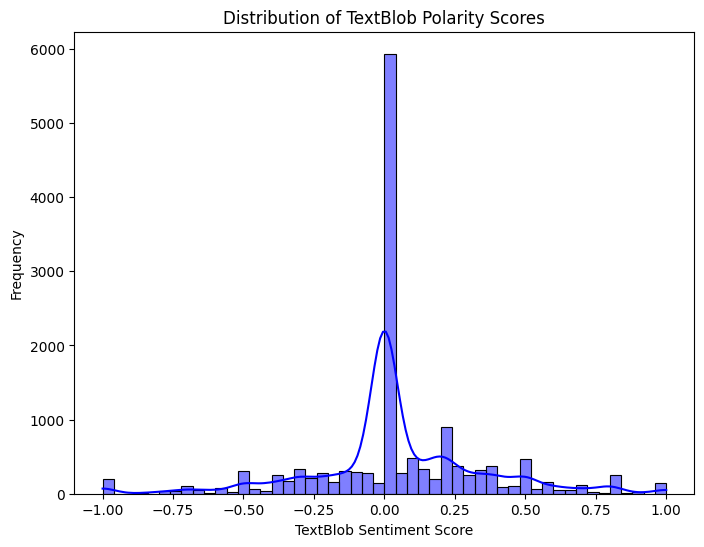

In [83]:
# Distribution of VADER and TextBlob sentiment scores
plt.figure(figsize=(8, 6))
sns.histplot(df_sentiment['vader_sentiment'], bins=50, kde=True, color='purple')
plt.title('Distribution of VADER Sentiment Scores')
plt.xlabel('VADER Sentiment Score')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(8, 6))
sns.histplot(df_sentiment['textblob_sentiment'], bins=50, kde=True, color='blue')
plt.title('Distribution of TextBlob Polarity Scores')
plt.xlabel('TextBlob Sentiment Score')
plt.ylabel('Frequency')
plt.show()

<ipython-input-84-909ca12a0a36>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Frequency', y='Word', data=positive_df, palette='Greens_d', legend=False)
<ipython-input-84-909ca12a0a36>:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Frequency', y='Word', data=negative_df, palette='Reds_d', legend=False)


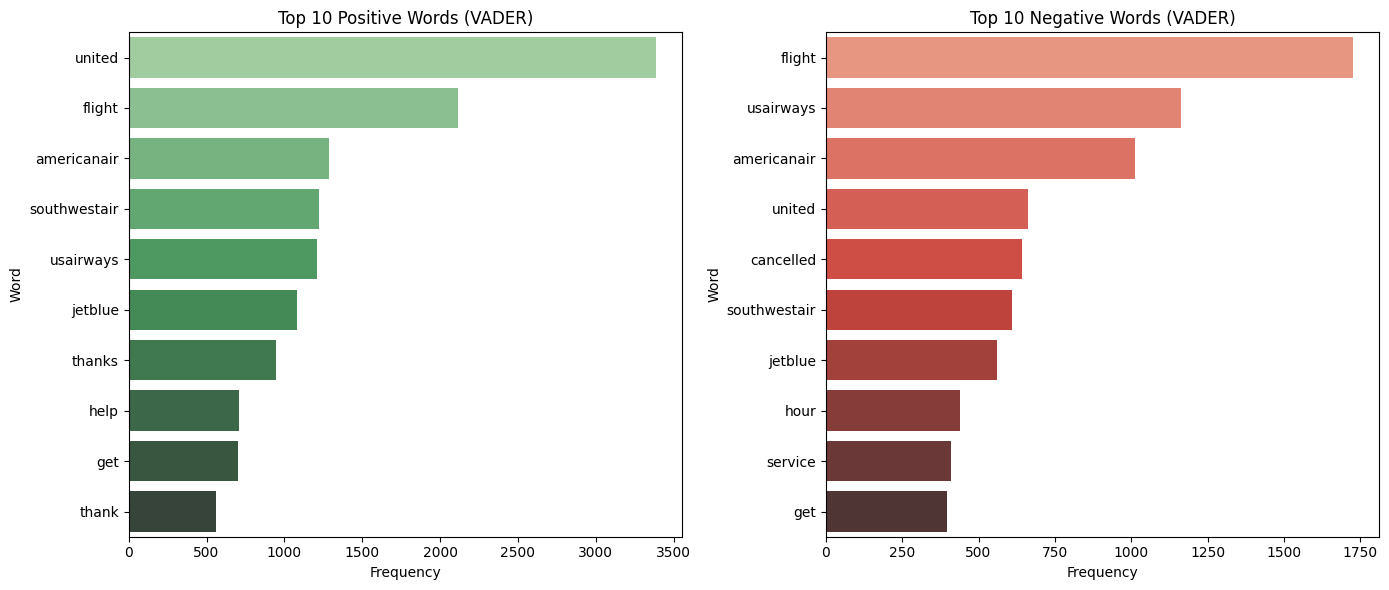

In [84]:
# Tokenize words and categorize based on VADER sentiment
def get_words_by_sentiment(sentiment_label):
    words = []
    for text in df_sentiment[df_sentiment['vader_label'] == sentiment_label]['clean_text']:
        words.extend(text.split())
    return words

# Get the most common positive and negative words
positive_words = get_words_by_sentiment(1)
negative_words = get_words_by_sentiment(-1)

# Count word frequencies
positive_word_freq = Counter(positive_words).most_common(10)
negative_word_freq = Counter(negative_words).most_common(10)

# Convert to DataFrame for visualization
positive_df = pd.DataFrame(positive_word_freq, columns=['Word', 'Frequency'])
negative_df = pd.DataFrame(negative_word_freq, columns=['Word', 'Frequency'])

# Plot bar charts for positive and negative words
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.barplot(x='Frequency', y='Word', data=positive_df, palette='Greens_d', legend=False)
plt.title('Top 10 Positive Words (VADER)')

plt.subplot(1, 2, 2)
sns.barplot(x='Frequency', y='Word', data=negative_df, palette='Reds_d', legend=False)
plt.title('Top 10 Negative Words (VADER)')
plt.tight_layout()
plt.show()


In [85]:
# Extract coordinates from 'tweet_coord' for map visualization
df_coordinates = df_original.copy()  # Keep the original DataFrame for coordinates

def extract_coords(coord):
    try:
        coord = literal_eval(coord)  # Convert string to tuple
        if len(coord) == 2:  # If it's a valid latitude-longitude pair
            return coord
    except (ValueError, SyntaxError):
        return None

df_coordinates['coordinates'] = df_coordinates['tweet_coord'].apply(extract_coords)
df_coordinates['latitude'] = df_coordinates['coordinates'].apply(lambda x: x[0] if x else None)
df_coordinates['longitude'] = df_coordinates['coordinates'].apply(lambda x: x[1] if x else None)

# Drop rows with missing coordinates
df_coords = df_coordinates.dropna(subset=['latitude', 'longitude'])

# Initialize a Folium map centered around the mean coordinates
mean_lat = df_coords['latitude'].mean()
mean_lon = df_coords['longitude'].mean()
m = folium.Map(location=[mean_lat, mean_lon], zoom_start=4)

# Initialize the marker cluster
marker_cluster = MarkerCluster().add_to(m)

# Add clustered markers
for _, row in df_coords.iterrows():
    folium.Marker(
        location=[row['latitude'], row['longitude']],
        popup=row['text'],  # Show tweet text on click
        icon=folium.Icon(color='blue', icon='info-sign')
    ).add_to(marker_cluster)

# Display the map
display(m)

###**Spltting dataset**

In [86]:
# Define features (clean text) and labels (sentiment)
X = df_cleaned['clean_text']
y = df_cleaned['sentiment_label']

# Split the data into train and test sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply TF-IDF vectorization on the text data (max 5000 features)
vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

###**Logistic regression**

In [115]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Train Logistic Regression
lr_model = LogisticRegression()
lr_model.fit(X_train_tfidf, y_train)

# Evaluate the model
y_pred_lr = lr_model.predict(X_test_tfidf)
print("Logistic Regression Results:")
print(classification_report(y_test, y_pred_lr))


Logistic Regression Results:
              precision    recall  f1-score   support

           0       0.82      0.95      0.88      1816
           1       0.73      0.52      0.61       618
           2       0.78      0.58      0.67       447

    accuracy                           0.80      2881
   macro avg       0.78      0.68      0.72      2881
weighted avg       0.79      0.80      0.79      2881



###**Naive Bayes**

In [116]:
from sklearn.naive_bayes import MultinomialNB

# Train Naive Bayes
nb_model = MultinomialNB()
nb_model.fit(X_train_tfidf, y_train)

# Evaluate the model
y_pred_nb = nb_model.predict(X_test_tfidf)
print("Naive Bayes Results:")
print(classification_report(y_test, y_pred_nb))


Naive Bayes Results:
              precision    recall  f1-score   support

           0       0.71      0.99      0.83      1816
           1       0.76      0.24      0.36       618
           2       0.86      0.31      0.45       447

    accuracy                           0.72      2881
   macro avg       0.78      0.51      0.55      2881
weighted avg       0.75      0.72      0.67      2881



###**Support Vector Machine**

In [117]:
from sklearn.svm import SVC

# Train SVM
svm_model = SVC(kernel='linear', probability=True)
svm_model.fit(X_train_tfidf, y_train)

# Evaluate the model
y_pred_svm = svm_model.predict(X_test_tfidf)
print("Support Vector Machine Results:")
print(classification_report(y_test, y_pred_svm))


Support Vector Machine Results:
              precision    recall  f1-score   support

           0       0.82      0.93      0.87      1816
           1       0.68      0.51      0.58       618
           2       0.75      0.60      0.67       447

    accuracy                           0.79      2881
   macro avg       0.75      0.68      0.71      2881
weighted avg       0.78      0.79      0.78      2881



###**Ensemble**

In [118]:
from sklearn.ensemble import VotingClassifier

# Combine predictions from Logistic Regression, Naive Bayes and Support Vector Machine
ensemble_model = VotingClassifier(estimators=[
    ('lr', lr_model),
    ('nb', nb_model),
    ('svm', svm_model)
], voting='soft')

# Train the ensemble model
ensemble_model.fit(X_train_tfidf, y_train)

# Evaluate ensemble model
y_pred_ensemble = ensemble_model.predict(X_test_tfidf)
print("Ensemble Results:")
print(classification_report(y_test, y_pred_ensemble))


Ensemble Results:
              precision    recall  f1-score   support

           0       0.80      0.96      0.87      1816
           1       0.74      0.46      0.57       618
           2       0.79      0.56      0.66       447

    accuracy                           0.79      2881
   macro avg       0.78      0.66      0.70      2881
weighted avg       0.79      0.79      0.77      2881



In [91]:
!pip install pandas scikit-learn

###**USING ADABOOST ENSEMBLING METHOD**

In [119]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

### Using AdaBoost
# Initialize the base estimator (weak learner)
base_estimator = DecisionTreeClassifier(max_depth=1)  # Stump

# Initialize AdaBoost classifier
ada_model = AdaBoostClassifier( n_estimators=50, random_state=42)

# Train the AdaBoost model
ada_model.fit(X_train_tfidf, y_train)

# Make predictions
y_pred_ada = ada_model.predict(X_test_tfidf)

# Evaluate the AdaBoost model
print("AdaBoost Results:")
print(classification_report(y_test, y_pred_ada))


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoost Results:
              precision    recall  f1-score   support

           0       0.75      0.92      0.83      1816
           1       0.58      0.27      0.36       618
           2       0.69      0.54      0.61       447

    accuracy                           0.72      2881
   macro avg       0.67      0.58      0.60      2881
weighted avg       0.70      0.72      0.69      2881



### **Using Gradient Boosting**

In [120]:
### Using Gradient Boosting
# Initialize Gradient Boosting classifier
gb_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Train the Gradient Boosting model
gb_model.fit(X_train_tfidf, y_train)

# Make predictions
y_pred_gb = gb_model.predict(X_test_tfidf)

# Evaluate the Gradient Boosting model
print("Gradient Boosting Results:")
print(classification_report(y_test, y_pred_gb))

Gradient Boosting Results:
              precision    recall  f1-score   support

           0       0.74      0.96      0.84      1816
           1       0.77      0.24      0.36       618
           2       0.73      0.51      0.61       447

    accuracy                           0.74      2881
   macro avg       0.75      0.57      0.60      2881
weighted avg       0.74      0.74      0.70      2881



###**Random Forest Classifier**

In [121]:
from sklearn.ensemble import RandomForestClassifier

# Train Random Forest
rf_model = RandomForestClassifier(n_estimators=100)
rf_model.fit(X_train_tfidf, y_train)

# Evaluate Random Forest
y_pred_rf = rf_model.predict(X_test_tfidf)
print("Random Forest Results:")
print(classification_report(y_test, y_pred_rf))


Random Forest Results:
              precision    recall  f1-score   support

           0       0.79      0.94      0.86      1816
           1       0.68      0.43      0.52       618
           2       0.74      0.54      0.62       447

    accuracy                           0.77      2881
   macro avg       0.74      0.64      0.67      2881
weighted avg       0.76      0.77      0.75      2881



###**BERT ANALYSIS**

In [95]:
import pandas as pd
import nltk
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# Download necessary NLTK data
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

# Load the dataset
df = pd.read_csv('Tweets.csv')
print(df.info())

# Select relevant columns and filter based on sentiment confidence
df = df[['airline_sentiment', 'airline_sentiment_confidence', 'text']]
df = df[df['airline_sentiment_confidence'] > 0.6]

# Initialize Lemmatizer and stopwords
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

# Define cleaning function
def clean_text(text):
    text = re.sub(r'http\S+', '', text)  # Remove URLs
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # Remove special characters
    text = text.lower()  # Convert to lowercase
    words = word_tokenize(text)
    words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]
    return ' '.join(words)

# Text cleaning
df['clean_text'] = df['text'].apply(clean_text)

# Drop rows with missing values
df = df.dropna(subset=['clean_text', 'airline_sentiment'])

# Encode sentiment labels: 'positive' -> 1, 'neutral' -> 0, 'negative' -> -1
df['sentiment_label'] = df['airline_sentiment'].map({'positive': 1, 'neutral': 0, 'negative': -1})

# Create a new DataFrame with cleaned text and sentiment labels
cleaned_df = df[['clean_text', 'sentiment_label']].reset_index(drop=True)

# Cleaned data
print(cleaned_df.head())

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  int64  
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14640 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14640 non-null  int64  
 10  text                          14640 non-null  object 
 11  tweet_coord                   1019 non-null   object 
 12  tweet_created                 14640 non-null  object 
 13  t

In [96]:
import pandas as pd
import torch
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from transformers import BertTokenizer, BertForSequenceClassification
from transformers import Trainer, TrainingArguments

# Assuming cleaned_df is your new DataFrame with 'clean_text' and 'sentiment_label'
# For the context of this code snippet, let's define cleaned_df again.
# Remove this part if you already have cleaned_df prepared.

import nltk
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

df = pd.read_csv('Tweets.csv')  # Replace with your CSV file path
print(df.info())

# Select relevant columns
df = df[['airline_sentiment', 'airline_sentiment_confidence', 'text']]

# Filter based on sentiment confidence
df = df[df['airline_sentiment_confidence'] > 0.6]

# Initialize Lemmatizer and stopwords
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  int64  
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14640 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14640 non-null  int64  
 10  text                          14640 non-null  object 
 11  tweet_coord                   1019 non-null   object 
 12  tweet_created                 14640 non-null  object 
 13  t

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [97]:
# Define cleaning function before using BERT
def clean_text(text):
    text = re.sub(r'http\S+', '', text)  # Remove URLs
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # Remove special characters
    text = text.lower()  # Convert to lowercase
    words = word_tokenize(text)
    words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]
    return ' '.join(words)

# Text cleaning
df['clean_text'] = df['text'].apply(clean_text)

# Drop rows with missing values
df = df.dropna(subset=['clean_text', 'airline_sentiment'])

# Encode sentiment labels: 'positive' -> 2, 'neutral' -> 1, 'negative' -> 0
df['sentiment_label'] = df['airline_sentiment'].map({'positive': 2, 'neutral': 1, 'negative': 0})

# Create a new DataFrame with cleaned text and sentiment labels
cleaned_df = df[['clean_text', 'sentiment_label']]
print(cleaned_df.head())

# Define features and labels
X = cleaned_df['clean_text']
y = cleaned_df['sentiment_label']  # Ensure this contains the sentiment labels

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Load the BERT tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Tokenization
train_encodings = tokenizer(list(X_train), truncation=True, padding=True, max_length=512)
test_encodings = tokenizer(list(X_test), truncation=True, padding=True, max_length=512)

# Convert to PyTorch Dataset
class SentimentDataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx])
        return item

    def __len__(self):
        return len(self.labels)

                                          clean_text  sentiment_label
0                        virginamerica dhepburn said                1
2  virginamerica didnt today must mean need take ...                1
3  virginamerica really aggressive blast obnoxiou...                0
4                 virginamerica really big bad thing                0
5  virginamerica seriously would pay flight seat ...                0


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [98]:
unique_values = {col: cleaned_df[col].unique() for col in cleaned_df.columns}

# Display the unique values for each column
for column, values in unique_values.items():
    print(f"Unique values in '{column}': {values}\n")


Unique values in 'clean_text': ['virginamerica dhepburn said'
 'virginamerica didnt today must mean need take another trip'
 'virginamerica really aggressive blast obnoxious entertainment guest face amp little recourse'
 ... 'americanair please bring american airline blackberry'
 'americanair money change flight dont answer phone suggestion make commitment'
 'americanair ppl need know many seat next flight plz put u standby people next flight']

Unique values in 'sentiment_label': [1 0 2]



In [99]:
# Create Dataset
train_dataset = SentimentDataset(train_encodings, y_train.values)
test_dataset = SentimentDataset(test_encodings, y_test.values)

# Load the BERT model for sequence classification with three labels
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=3)

# Define training arguments
training_args = TrainingArguments(
    output_dir='./results',          # output directory
    num_train_epochs=1,              # total number of training epochs
    per_device_train_batch_size=8,   # batch size per device during training
    per_device_eval_batch_size=8,    # batch size for evaluation
    warmup_steps=500,                 # number of warmup steps for learning rate scheduler
    weight_decay=0.01,               # strength of weight decay
    logging_dir='./logs',            # directory for storing logs
    logging_steps=10,
)

# Initialize the Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
)

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [100]:
# Train the model
trainer.train()

# Evaluate the model
y_pred = trainer.predict(test_dataset)

# Convert predictions to a tensor and get the predicted class labels
predictions = torch.argmax(torch.tensor(y_pred.predictions), axis=1)

# Print classification report
print(classification_report(y_test, predictions.numpy()))

Step,Training Loss
10,1.406600
20,1.305300
30,1.225700
40,1.081500
50,1.025600
60,0.954500
70,0.925000
80,0.857800
90,0.863800
100,0.936700


              precision    recall  f1-score   support

           0       0.86      0.91      0.88      1816
           1       0.66      0.59      0.62       618
           2       0.74      0.70      0.72       447

    accuracy                           0.81      2881
   macro avg       0.75      0.73      0.74      2881
weighted avg       0.80      0.81      0.80      2881



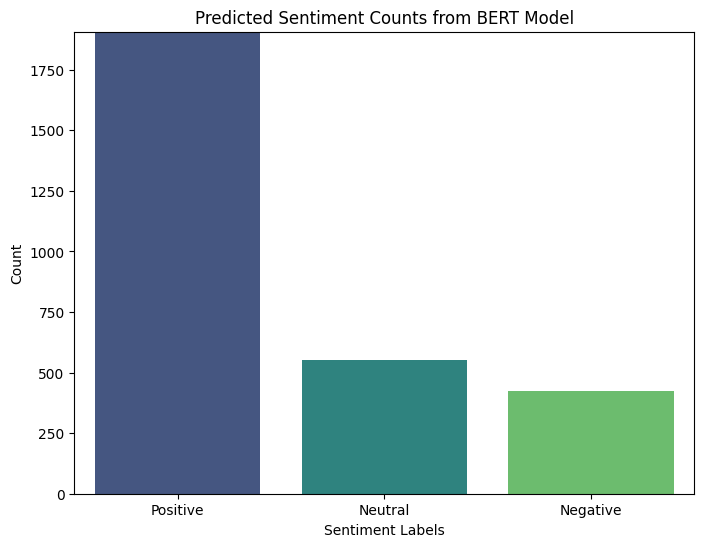

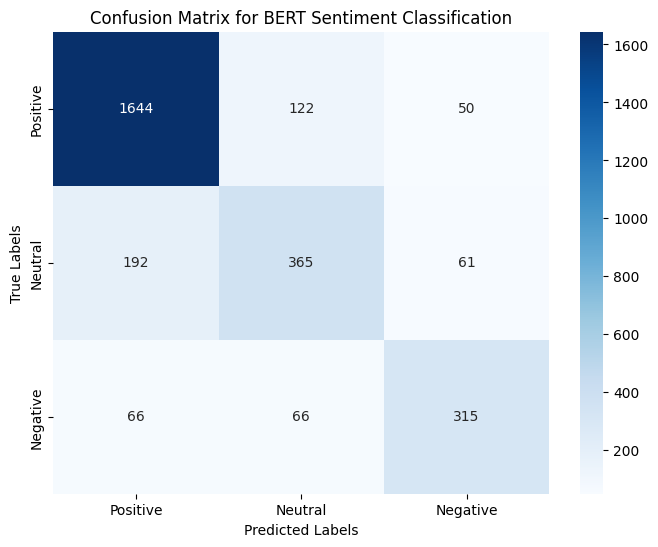

In [110]:
import torch
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Assuming you already have your predictions and test labels
predictions = torch.argmax(torch.tensor(y_pred.predictions), axis=1)

# Convert predictions to numpy for compatibility with scikit-learn
y_pred_labels = predictions.numpy()

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred_labels, labels=[0, 1, 2])  # Replace with the order of your sentiment labels

# Create a bar graph for predicted sentiment counts
sentiment_labels = ['Positive', 'Neutral', 'Negative']
predicted_counts = [np.sum(y_pred_labels == i) for i in range(len(sentiment_labels))]

# Plotting the bar graph
plt.figure(figsize=(8, 6))
# Use hue to avoid the FutureWarning
sns.barplot(x=sentiment_labels, y=predicted_counts, palette='viridis', hue=sentiment_labels)
plt.title("Predicted Sentiment Counts from BERT Model")
plt.xlabel("Sentiment Labels")
plt.ylabel("Count")
plt.ylim(0, max(predicted_counts) + 5)  # Adjust y-axis limit for better visualization
plt.show()

# Plot the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Positive', 'Neutral', 'Negative'],
            yticklabels=['Positive', 'Neutral', 'Negative'])

plt.title("Confusion Matrix for BERT Sentiment Classification")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()


### **FINAL RESULTS**

In [122]:
from sklearn.metrics import classification_report
import torch
results = {
    'Model': [],
    'Accuracy': [],
    'Precision': [],
    'Recall': []
}

# Function to extract metrics from classification report
def extract_metrics(report, model_name):
    results['Model'].append(model_name)
    results['Accuracy'].append(report['accuracy'])
    results['Precision'].append(report['weighted avg']['precision'])
    results['Recall'].append(report['weighted avg']['recall'])

# Evaluate and extract metrics for traditional models
# 1. Random Forest Model
y_pred_rf = rf_model.predict(X_test_tfidf)  # Get predictions for Random Forest
extract_metrics(classification_report(y_test, y_pred_rf, output_dict=True, zero_division=0), 'Random Forest Classifier')

# 2. Gradient Boosting Model
extract_metrics(classification_report(y_test, y_pred_gb, output_dict=True, zero_division=0), 'Gradient Boosting Machine')

# 3. AdaBoost Model
extract_metrics(classification_report(y_test, y_pred_ada, output_dict=True, zero_division=0), 'Adaptive Boosting (AdaBoost)')

# 4. Ensemble Model
y_pred_ensemble = ensemble_model.predict(X_test_tfidf)
extract_metrics(classification_report(y_test, y_pred_ensemble, output_dict=True, zero_division=0), 'Ensemble using VotingClassifier')

# 5. SVM Model
y_pred_svm = svm_model.predict(X_test_tfidf)  # Get predictions for SVM
extract_metrics(classification_report(y_test, y_pred_svm, output_dict=True, zero_division=0), 'Support Vector Machine')

# 6. Naive Bayes Model
y_pred_nb = nb_model.predict(X_test_tfidf)
extract_metrics(classification_report(y_test, y_pred_nb, output_dict=True, zero_division=0), 'Naive Bayes')

# 7. Logistic Regression Model
y_pred_lr = lr_model.predict(X_test_tfidf)
extract_metrics(classification_report(y_test, y_pred_lr, output_dict=True, zero_division=0), 'Logistic Regression')

# Evaluate the BERT model
y_pred = trainer.predict(test_dataset)

# Convert predictions to a tensor and get the predicted class labels
predictions = torch.argmax(torch.tensor(y_pred.predictions), axis=1)

# Extract BERT metrics
extract_metrics(classification_report(y_test, predictions.numpy(), output_dict=True, zero_division=0), 'BERT Model')

# Convert the results dictionary into a DataFrame
results_df = pd.DataFrame(results)

# Sort the DataFrame by Accuracy in descending order
results_df = results_df.sort_values(by='Accuracy', ascending=False).reset_index(drop=True)

# Display the DataFrame
results_df


Step,Training Loss
10,0.423800
20,0.479200
30,0.407900
40,0.390500
50,0.528600
60,0.414400
70,0.596100


,Model,Accuracy,Precision,Recall
0,BERT Model,0.802846,0.799163,0.802846
1,Logistic Regression,0.801458,0.794175,0.801458
2,Ensemble using VotingClassifier,0.791045,0.786120,0.791045
3,Support Vector Machine,0.788962,0.779375,0.788962
4,Random Forest Classifier,0.770566,0.759231,0.770566
5,Gradient Boosting Machine,0.738980,0.743229,0.738980
6,Naive Bayes,0.723013,0.745282,0.723013
7,Adaptive Boosting (AdaBoost),0.722666,0.700866,0.722666
